In [1]:
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# 데이터를 불러오자
cloth_raw = pd.read_csv('./data/의류_train.csv')
cloth_raw[:3]

,IDX,발화자,발화문,카테고리,QA번호,QA여부,감성,인텐트,가격,수량,크기,장소,조직,사람,시간,날짜,상품명,상담번호,상담내순번
0,1,c,아침도 아니고 밤 12시 30분에 결제한 건데도 그런가요?,의류,67435,q,m,주문_취소_확인,NaN,NaN,NaN,NaN,NaN,NaN,밤 12시 30분,NaN,NaN,67435,1
1,2,s,네 저희가 보통 그날 12시에 발주 마감이여서요 일단 내일 물건 오는 대로 보내드릴게요.,의류,67435,a,m,주문_취소_확인,NaN,NaN,NaN,NaN,NaN,NaN,12시,NaN,NaN,67435,2
2,3,c,실수로 취소하면 재주문해야 하는 거죠?,의류,34557,q,m,주문_취소_확인,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34557,1


In [3]:
# 카테고리 항목이 모두 의류인지 확인
cloth_raw['카테고리'].value_counts()

의류    419428
Name: 카테고리, dtype: int64

In [4]:
# 필요한 컬럼만 추출
cloth = cloth_raw[['발화자', '발화문', '인텐트']]
cloth[:3]

,발화자,발화문,인텐트
0,c,아침도 아니고 밤 12시 30분에 결제한 건데도 그런가요?,주문_취소_확인
1,s,네 저희가 보통 그날 12시에 발주 마감이여서요 일단 내일 물건 오는 대로 보내드릴게요.,주문_취소_확인
2,c,실수로 취소하면 재주문해야 하는 거죠?,주문_취소_확인


In [5]:
# 인텐트 확인
cloth['인텐트'].value_counts()

제품_정보_질문      78737
배송_날짜_질문      50600
제품_재고_질문      33742
제품_일반_질문      19383
제품_추천_질문      16873
              ...  
제품_구성_비교          2
AS_날짜_요청          2
결제_추가_확인          2
웹사이트_가입_확인        1
제품_재고_비교          1
Name: 인텐트, Length: 249, dtype: int64

In [6]:
# 챗봇에 사용할 목록: 상품 추천, 의류 문의, 구매 목록, 배송 문의

In [7]:
# pandas에서 특정 단어가 포함된 DataFrame을 읽어오는 방법
# 데이터프레임이 csv 파일 형식이라고 가정
# dt = pd.read_csv('읽어올 데이터프레임 경로') 
# D라는 컬럼에서 A라는 단어가 포함된 내용 읽어오기
# dt[dt['D'].str.contains['A']]

In [8]:
# 상품 추천 데이터프레임

In [9]:
cloth_rc = cloth[cloth['인텐트'].str.contains('제품_추천')]
cloth_rc

,발화자,발화문,인텐트
16161,s,그럼 구십호 보세요,제품_추천_확인
16162,c,구십호요?,제품_추천_확인
16163,s,네,제품_추천_확인
16164,c,"아, 애들이 이런 걸 입어요?",제품_추천_확인
16165,s,그럼요. 애들이 너무 좋아요,제품_추천_확인
...,...,...,...
360985,s,핏감 있게 나온 제품이라베이지라 하더라도 살쪄 보이진 않으시구요 팔뚝살 또는 어깨살...,제품_추천_비교
360986,c,66사이즈 구매하고 싶은데 73으로 선택해야 되지요?,제품_추천_비교
360987,s,66사이즈 70 사이즈로 참고하셔서 구매 부탁드려요.,제품_추천_비교
360988,c,"평소 95사이즈 입고 겨울 패딩, 가디건은 100사이즈 입는데 이 상품 사이즈 어떻...",제품_추천_비교


In [10]:
cloth_rc.loc[cloth_rc['인텐트'].str.contains('제품_추천'),'인텐트']='상품 추천'
cloth_rc # 22615 rows × 3 columns

,발화자,발화문,인텐트
16161,s,그럼 구십호 보세요,상품 추천
16162,c,구십호요?,상품 추천
16163,s,네,상품 추천
16164,c,"아, 애들이 이런 걸 입어요?",상품 추천
16165,s,그럼요. 애들이 너무 좋아요,상품 추천
...,...,...,...
360985,s,핏감 있게 나온 제품이라베이지라 하더라도 살쪄 보이진 않으시구요 팔뚝살 또는 어깨살...,상품 추천
360986,c,66사이즈 구매하고 싶은데 73으로 선택해야 되지요?,상품 추천
360987,s,66사이즈 70 사이즈로 참고하셔서 구매 부탁드려요.,상품 추천
360988,c,"평소 95사이즈 입고 겨울 패딩, 가디건은 100사이즈 입는데 이 상품 사이즈 어떻...",상품 추천


In [11]:
# 의류 문의

In [12]:
cloth_info = cloth[cloth['인텐트'].str.contains('제품_정보')]
cloth_info # 84629 rows × 3 columns

,발화자,발화문,인텐트
38279,c,그러면 아까랑 사이즈는 똑같아요?,제품_정보_비교
38280,s,네 같아요,제품_정보_비교
38281,c,실크가 훨씬 따뜻하죠?,제품_정보_비교
38282,s,그럼요,제품_정보_비교
38283,s,일단 이거 두개하면 비교해보시겠어요?,제품_정보_비교
...,...,...,...
336093,s,문의하신 제품 M 총장 : 86CM 입니다 사이즈는 쟤는 방식에 따라 2 - 3CM...,제품_정보_질문
336094,c,13번 패딤 베스트 가슴 돌레가 어?게 되나요?,제품_정보_질문
336095,s,안녕하셔요 상세패이지 하단에 나와 있습니다 확인 부탁드립니다.,제품_정보_질문
336096,c,살짝 핑크빛이 도는데 이 귀걸이 색상이 뭔가요?,제품_정보_질문


In [13]:
cloth_info.loc[cloth_info['인텐트'].str.contains('제품_정보'),'인텐트']='의류 문의' # 인텐트명 변경
cloth_info

,발화자,발화문,인텐트
38279,c,그러면 아까랑 사이즈는 똑같아요?,의류 문의
38280,s,네 같아요,의류 문의
38281,c,실크가 훨씬 따뜻하죠?,의류 문의
38282,s,그럼요,의류 문의
38283,s,일단 이거 두개하면 비교해보시겠어요?,의류 문의
...,...,...,...
336093,s,문의하신 제품 M 총장 : 86CM 입니다 사이즈는 쟤는 방식에 따라 2 - 3CM...,의류 문의
336094,c,13번 패딤 베스트 가슴 돌레가 어?게 되나요?,의류 문의
336095,s,안녕하셔요 상세패이지 하단에 나와 있습니다 확인 부탁드립니다.,의류 문의
336096,c,살짝 핑크빛이 도는데 이 귀걸이 색상이 뭔가요?,의류 문의


In [14]:
# '구매 제품'
# 조회 시 제품으로 분류되어 의류뿐 아니라 악세서리도 데이터에서 보임
# '발화문'에서 구매 확인, 구매 흥미만 보이므로 사용하지 않음
cloth_list = cloth[cloth['인텐트'].str.contains('구매_제품')]
cloth_list

,발화자,발화문,인텐트
12635,c,레터링 이니셜 반지 9mm 짜리 18k 주문 좀 해주실 수 있을까요?,구매_제품_요청
12636,s,레터링 이니셜 반지 9mm 18k로 주문 진행해 드릴게요.,구매_제품_요청
12637,c,#이름#가 광고한 슬랙스 보여주실래요?,구매_제품_요청
12638,s,네 이쪽에 있어요.,구매_제품_요청
12639,c,지금 실버 체인 목걸이로 한 개 구매하려고요.,구매_제품_요청
...,...,...,...
112431,s,네. 목걸이 체인만 따로 사실 수 있습니다.,구매_제품_확인
112432,c,목걸이 체인만 구매 가능한 거 맞죠?,구매_제품_확인
112433,s,네. 목걸이 체인만 구매 가능합니다.,구매_제품_확인
112434,c,제가 고른 스판 셔츠 결제 완료된 거 맞아요?,구매_제품_확인


In [15]:
# 구매 목록 확인 데이터는 '결제'라는 단어가 포함된 데이터 사용
cloth_list2 = cloth[cloth['인텐트'].str.contains('결제')]
cloth_list2

,발화자,발화문,인텐트
4314,c,영수증도 같이 주세요,결제_영수증_요청
4315,c,알았어요 현금 영수증도 해주세요,결제_영수증_요청
4316,s,네,결제_영수증_요청
4317,c,영수증도 같이받으께요,결제_영수증_요청
4318,s,영수증 여기있구요 카드 여기있습니다,결제_영수증_요청
...,...,...,...
419086,s,주문 취소 확인되시네요.,결제_일반_요청
419087,c,L XL면 사이즈가 큰데 L로 가능할까요?,결제_일반_요청
419088,s,모자 사이즈는 기성품으로 저희가 변경해 드릴수 없는 점 참고 부탁드릴게요.,결제_일반_요청
419089,c,선택에는 없는데 분홍과 파랑 5족씩 구매하고 싶은데 가능한가요?,결제_일반_요청


In [16]:
cloth_list2.loc[cloth_list2['인텐트'].str.contains('결제'),'인텐트']='구매 목록'
cloth_list2 # 6821 rows × 3 columns

,발화자,발화문,인텐트
4314,c,영수증도 같이 주세요,구매 목록
4315,c,알았어요 현금 영수증도 해주세요,구매 목록
4316,s,네,구매 목록
4317,c,영수증도 같이받으께요,구매 목록
4318,s,영수증 여기있구요 카드 여기있습니다,구매 목록
...,...,...,...
419086,s,주문 취소 확인되시네요.,구매 목록
419087,c,L XL면 사이즈가 큰데 L로 가능할까요?,구매 목록
419088,s,모자 사이즈는 기성품으로 저희가 변경해 드릴수 없는 점 참고 부탁드릴게요.,구매 목록
419089,c,선택에는 없는데 분홍과 파랑 5족씩 구매하고 싶은데 가능한가요?,구매 목록


In [17]:
# 배송 문의

In [18]:
cloth_delivery = cloth[cloth['인텐트'].str.contains('배송')]
cloth_delivery

,발화자,발화문,인텐트
4,c,택배비 따로 추가되나요?,배송_비용_질문
5,s,아뇨 택배비는 따로 추가없습니다,배송_비용_질문
6,c,택배비 있나요?,배송_비용_질문
7,s,택배비는 저희 무상입니다,배송_비용_질문
8,c,택배비 따로 들어요,배송_비용_질문
...,...,...,...
418602,s,주문해주신 상품금일배송되셨습니다 배송 조회 가능하세요.,배송_날짜_요청
418603,c,"2018.08.17배송 도착이여서 2018.08.14 구매했는데요, 아직 상품 준비...",배송_날짜_요청
418604,s,14일 오전 9시 이후 결제건은 16일 오전 9시부터 주문 확인 시작되시고요.,배송_날짜_요청
418605,c,지난달 23일에 주문했습니다. 이번 주에는 받을 수 있는 건가요?,배송_날짜_요청


In [19]:
cloth_delivery.loc[cloth_delivery['인텐트'].str.contains('배송'),'인텐트']='배송 문의'
cloth_delivery # 75303 rows x 3 columns

,발화자,발화문,인텐트
4,c,택배비 따로 추가되나요?,배송 문의
5,s,아뇨 택배비는 따로 추가없습니다,배송 문의
6,c,택배비 있나요?,배송 문의
7,s,택배비는 저희 무상입니다,배송 문의
8,c,택배비 따로 들어요,배송 문의
...,...,...,...
418602,s,주문해주신 상품금일배송되셨습니다 배송 조회 가능하세요.,배송 문의
418603,c,"2018.08.17배송 도착이여서 2018.08.14 구매했는데요, 아직 상품 준비...",배송 문의
418604,s,14일 오전 9시 이후 결제건은 16일 오전 9시부터 주문 확인 시작되시고요.,배송 문의
418605,c,지난달 23일에 주문했습니다. 이번 주에는 받을 수 있는 건가요?,배송 문의


In [20]:
# csv로 저장하자
cloth_rc.to_csv('./data/chatbot_dataset/cloth_rc.csv', header=True, index=False) # 상품 추천
cloth_info.to_csv('./data/chatbot_dataset/cloth_info.csv', header=True, index=False) # 의류 문의
cloth_list2.to_csv('./data/chatbot_dataset/cloth_list.csv', header=True, index=False) # 구매 목록
cloth_delivery.to_csv('./data/chatbot_dataset/cloth_delivery.csv', header=True, index=False) # 배송 문의

In [21]:
from IPython.display import Image

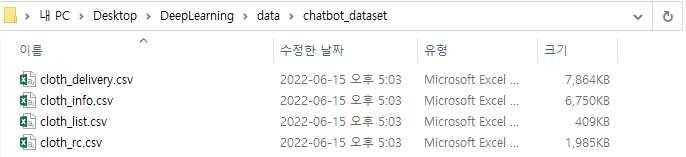

In [22]:
Image('image/dataset_B.png')

In [23]:
cloth_rc = pd.read_csv('./data/chatbot_dataset/cloth_rc.csv') # 상품 추천
cloth_info = pd.read_csv('./data/chatbot_dataset/cloth_info.csv') # 의류 문의
cloth_list = pd.read_csv('./data/chatbot_dataset/cloth_list.csv') # 구매 목록
cloth_delivery = pd.read_csv('./data/chatbot_dataset/cloth_delivery.csv')# 배송 문의

In [24]:
result = pd.concat([cloth_rc, cloth_info, cloth_list, cloth_delivery])
result

,발화자,발화문,인텐트
0,s,그럼 구십호 보세요,상품 추천
1,c,구십호요?,상품 추천
2,s,네,상품 추천
3,c,"아, 애들이 이런 걸 입어요?",상품 추천
4,s,그럼요. 애들이 너무 좋아요,상품 추천
...,...,...,...
75298,s,주문해주신 상품금일배송되셨습니다 배송 조회 가능하세요.,배송 문의
75299,c,"2018.08.17배송 도착이여서 2018.08.14 구매했는데요, 아직 상품 준비...",배송 문의
75300,s,14일 오전 9시 이후 결제건은 16일 오전 9시부터 주문 확인 시작되시고요.,배송 문의
75301,c,지난달 23일에 주문했습니다. 이번 주에는 받을 수 있는 건가요?,배송 문의


In [25]:
result.to_csv('./data/chatbot_dataset/chatbot_data.csv', header=True, index=False)